In [1]:
!pip install mglearn
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.1 MB/s eta 0:00:00


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs, load_breast_cancer
from sklearn_extra.cluster import KMedoids

In [11]:
def plot_scatter(X, preds):
  mglearn.discrete_scatter(X[:, 0], X[:, 1], preds)
  cluster_range = list(range(preds.max() + 1))
  plt.legend(['Cluster ' + str(k) for k in cluster_range])
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.show()

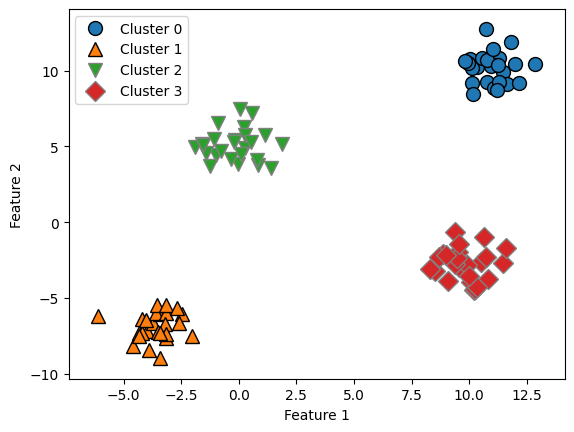

[0 1 2 1 0 3 2 0 3 3 3 0 1 0 0 0 1 2 0 2 1 2 0 2 0 3 1 3 0 3 2 3 1 0 1 1 0
 3 2 0 0 1 1 1 2 0 2 3 0 3 2 1 0 0 1 0 2 2 3 0 2 1 2 0 2 3 2 2 2 0 2 2 1 2
 3 0 3 3 3 2 3 1 1 2 3 2 3 3 3 1 1 1 1 1 1 3 1 3 0 3]


In [27]:
X, _ = make_blobs(n_samples=100, centers=[[10., -2.5], [-3.5, -7.], [0., 5.], [11., 10.]], random_state=42)
model = DBSCAN(eps=2., min_samples=2)
preds = model.fit_predict(X)
plot_scatter(X, preds)
print(preds)

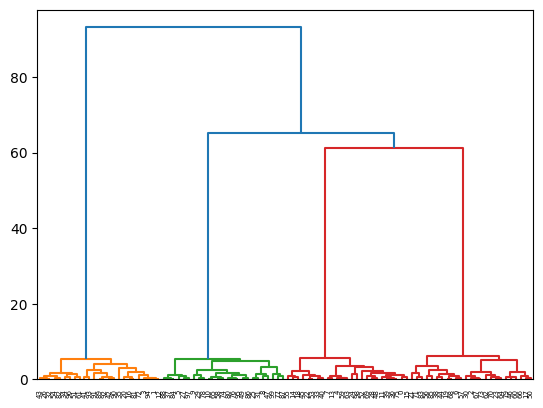

In [23]:
from scipy.cluster.hierarchy import dendrogram, ward

l_arr = ward(X)
dendrogram(l_arr)
plt.show()


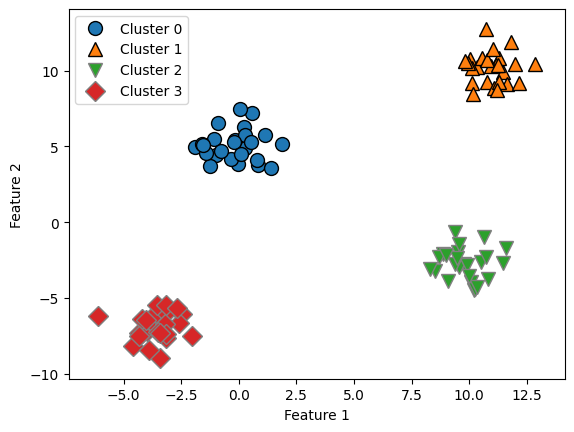

In [29]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=20, compute_full_tree=True)
preds = model.fit_predict(X)
plot_scatter(X, preds)

In [31]:
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target

In [73]:
model = KMedoids(n_clusters=2, init='k-medoids++')
preds = model.fit_predict(X)
acc_kmedoids = accuracy_score(y, preds)
acc_kmedoids

0.09490333919156414

In [74]:
silhouette_score(X, preds)

0.38698172254461755

In [75]:
model = KMeans(n_clusters=2, init='k-means++')
preds = model.fit_predict(X)
acc_kmeans = accuracy_score(y, preds)
acc_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.9279437609841827

In [76]:
silhouette_score(X, preds)

0.3845494883485513

In [77]:
model = AgglomerativeClustering(n_clusters=2)
preds = model.fit_predict(X)
preds = np.logical_not(preds).astype(int)
acc_agg = accuracy_score(y, preds)
acc_agg

0.13181019332161686

In [78]:
silhouette_score(X, preds)

0.36706054267114924

In [81]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)
model = DBSCAN(eps=.4, min_samples=4)
preds = model.fit_predict(X)
preds += 1
# preds = np.logical_not(preds).astype(int)
acc_db = accuracy_score(y, preds)
acc_db

0.7135325131810193

In [82]:
silhouette_score(X, preds)

0.3020521140461061